In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
from matplotlib import gridspec as gridspec

In [2]:
animal_df = pd.read_excel("../data/gas_measurements.xlsx", sheet_name='aggregated_animal_data')
animal_df[animal_df.organism == 'sheep'].head()

,sample_id,gas,partial_pressure_pct,organism,context,reference,method
33,8am-1,CO2,47.1,sheep,rumen gas,"Barry TN, Thompson A, Armstrong DG. 1977. Rume...","rumen gas collected through fistula, mean of t..."
34,morning_feed-1,CO2,24.5,sheep,rumen gas,"Barry TN, Thompson A, Armstrong DG. 1977. Rume...","rumen gas collected through fistula, mean of t..."
35,noon-1,CO2,47.5,sheep,rumen gas,"Barry TN, Thompson A, Armstrong DG. 1977. Rume...","rumen gas collected through fistula, mean of t..."
36,4pm-1,CO2,49.8,sheep,rumen gas,"Barry TN, Thompson A, Armstrong DG. 1977. Rume...","rumen gas collected through fistula, mean of t..."
37,afternoon_feed-1,CO2,31.7,sheep,rumen gas,"Barry TN, Thompson A, Armstrong DG. 1977. Rume...","rumen gas collected through fistula, mean of t..."


In [3]:
forest_soil_df = pd.read_excel("../data/gas_measurements.xlsx",
                               sheet_name='Brecheisen2019_SIdata',
                               na_values=['NO_DATA', 'FL'])
forest_soil_df['depth_cm'] = forest_soil_df['Depth_m']*100
forest_soil_df.head()

,Date,Treatment,Depth_m,Time,O2_pct,CO2_pct,O2_pct_Gfilled,CO2_pct_Gfilled,GC_CO2_pct,T _degC,depth_cm
0,2015-07-31,NaN,0.0,1039.0,20.9,0.04,20.9,0.040000,NaN,NaN,0.0
1,2015-07-31,H,0.0,NaN,20.9,0.04,20.9,0.040000,-0.616784,NaN,0.0
2,2015-07-31,H,0.0,NaN,20.9,0.04,20.9,0.040000,NaN,NaN,0.0
3,2015-07-31,H,0.0,NaN,20.9,0.04,20.9,0.040000,NaN,NaN,0.0
4,2015-07-31,H,0.5,NaN,19.9,NaN,19.9,0.709046,0.709046,NaN,50.0


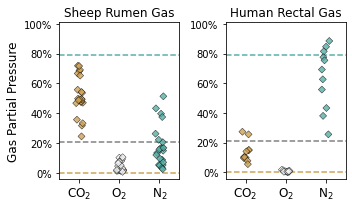

In [4]:
# animals

fig, axs = plt.subplots(figsize=(5, 3), ncols=2)

pal = sns.color_palette('BrBG', n_colors=3)

plt.sca(axs[0])
sheep_data = animal_df[animal_df.organism == 'sheep']
sns.stripplot(data=sheep_data, x='gas', y='partial_pressure_pct', dodge=0.1,
              marker='D', palette=pal, edgecolor='k', linewidth=0.5, alpha=0.8)
plt.axhline(0.04, ls='--', color=pal[0])
plt.axhline(21, ls='--', color='grey')
plt.axhline(79, ls='--', color=pal[2])

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Gas Partial Pressure', fontsize=12)
plt.xlabel('', fontsize=9)
plt.xticks(range(3), 'CO$_2$,O$_2$,N$_2$'.split(','), fontsize=12)
plt.title('Sheep Rumen Gas', fontsize=12)

ymin, _ = ax.get_ylim()
plt.ylim((ymin, 101))

plt.sca(axs[1])
human_data = animal_df[animal_df.organism == 'human']
sns.stripplot(data=human_data, x='gas', y='partial_pressure_pct', dodge=0.1,
              marker='D', palette=pal, edgecolor='k', linewidth=0.5, alpha=0.8)
plt.axhline(0.04, ls='--', color=pal[0])
plt.axhline(21, ls='--', color='grey')
plt.axhline(79, ls='--', color=pal[2])

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('', fontsize=9)
plt.ylabel('', fontsize=9)
plt.xticks(range(3), 'CO$_2$,O$_2$,N$_2$'.split(','), fontsize=12)
plt.title('Human Rectal Gas', fontsize=12)

ymin, _ = ax.get_ylim()
plt.ylim((ymin, 101))

plt.tight_layout()
plt.savefig('../figures/animal_gas.png', dpi=600, facecolor='w')
plt.show()

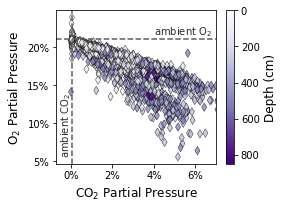

In [5]:
fig = plt.figure(figsize=(4, 3))

norm = plt.Normalize(forest_soil_df.depth_cm.min(),
                     forest_soil_df.depth_cm.max())
sm = plt.cm.ScalarMappable(cmap="Purples", norm=norm)
sm.set_array([])

sns.scatterplot(data=forest_soil_df, x='CO2_pct', y='O2_pct', hue='depth_cm',
                marker='d', edgecolor='k', lw=0.5, alpha=0.8, palette='Purples')
plt.legend().set_visible(False)

greys = sns.color_palette('Greys')
plt.axvline(0.04, ls='--', color=greys[-2])
plt.axhline(21, ls='--', color=greys[-2])
plt.xlim(-0.7,7)

plt.text(4, 21.6, 'ambient O$_2$', color=greys[-1], fontsize=10)
plt.text(-0.55, 6, 'ambient CO$_2$', rotation=90, color=greys[-1], fontsize=10)

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

cbar = plt.colorbar(sm)
cbar.ax.set_ylabel('Depth (cm)', fontsize=12)
cbar.ax.invert_yaxis()

plt.xlabel('CO$_2$ Partial Pressure', fontsize=12)
plt.ylabel('O$_2$ Partial Pressure', fontsize=12)

plt.tight_layout()
plt.savefig('../figures/soil_gas.png', dpi=600, facecolor='w')
plt.show()

In [6]:
forest_soil_df.describe()

,Depth_m,Time,O2_pct,CO2_pct,O2_pct_Gfilled,CO2_pct_Gfilled,GC_CO2_pct,T _degC,depth_cm
count,2705.000000,2325.000000,2423.000000,2337.000000,2705.000000,2704.000000,1712.000000,2002.000000,2705.000000
mean,2.114233,1321.784946,18.063805,2.252404,18.034349,2.229696,2.830887,25.896104,211.423290
std,1.964101,247.874538,2.641402,1.842217,2.551331,1.769821,1.700246,7.533447,196.410108
min,0.000000,155.000000,5.600000,-0.027000,5.600000,0.000000,-0.616784,0.000000,0.000000
25%,0.500000,1128.000000,16.400000,0.548000,16.500000,0.708000,1.351844,22.000000,50.000000
50%,1.500000,1323.000000,18.500000,1.933000,18.400000,1.900500,2.628044,27.000000,150.000000
75%,3.000000,1518.000000,20.300000,3.862000,20.200000,3.671000,4.266101,32.000000,300.000000
max,8.500000,2031.000000,23.900000,7.424000,23.900000,7.424000,7.533801,43.000000,850.000000
